# Exploratory analysis of the Studio Ghibli movies

## 1. Introduction
The Studio Ghibli films have always been many of my favourites, and so I have been eager to create some visualisations of the ratings for these films. 

Data has been collected from the API: https://ghibliapi.herokuapp.com/

The main score rating featured from the API is the RT score (Rotten Tomatoes score).


## 2. Data Collection
Please refer to the [data collection secion](https://github.com/nerusn/studio_ghibli_eda/blob/master/collecting_films_data.py) for quering data from the API.  

The dataset collected has only 20 rows, since this the number of Studio Ghibli movies.  

The original columns were 'id', 'title', 'description', 'director', 'producer', 'release_date' and 'rt_score'.  

The 'id' column was only useful for quering the data, and description is not useful here, so we did not query these columns when collecting the data.

## 3. Data Cleaning
Our data is already readily accessible, thus the data cleaning process will be a short one.

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
with open('ghibli_data.json') as f:
    data = json.load(f)

df = pd.DataFrame.from_dict(data, orient = 'columns')

In [3]:
df.head()

,title,director,producer,release_date,score
0,Castle in the Sky,Hayao Miyazaki,Isao Takahata,1986,95
1,Grave of the Fireflies,Isao Takahata,Toru Hara,1988,97
2,My Neighbor Totoro,Hayao Miyazaki,Hayao Miyazaki,1988,93
3,Kiki's Delivery Service,Hayao Miyazaki,Hayao Miyazaki,1989,96
4,Only Yesterday,Isao Takahata,Toshio Suzuki,1991,100


As mentioned earlier, these are the only relevant columns here.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         20 non-null     object
 1   director      20 non-null     object
 2   producer      20 non-null     object
 3   release_date  20 non-null     object
 4   score         20 non-null     object
dtypes: object(5)
memory usage: 928.0+ bytes


There are 20 entries as expected, and there are no null entries.

In [5]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
dtype: bool

None of the entries are duplicated, as required.

## 4. Data Exploration


Change score column to numeric.

In [6]:
df['score'] = pd.to_numeric(df['score'])

Create copy of dataframe, ordered by score descending.

In [7]:
df_score = df.sort_values('score', ascending = False)

Modify the title column to add the date alongisde it.

In [8]:
df_score['title'] = df_score['title'] +' ('+ df_score['release_date'] + ')'

Create Bar plot of the RT scores

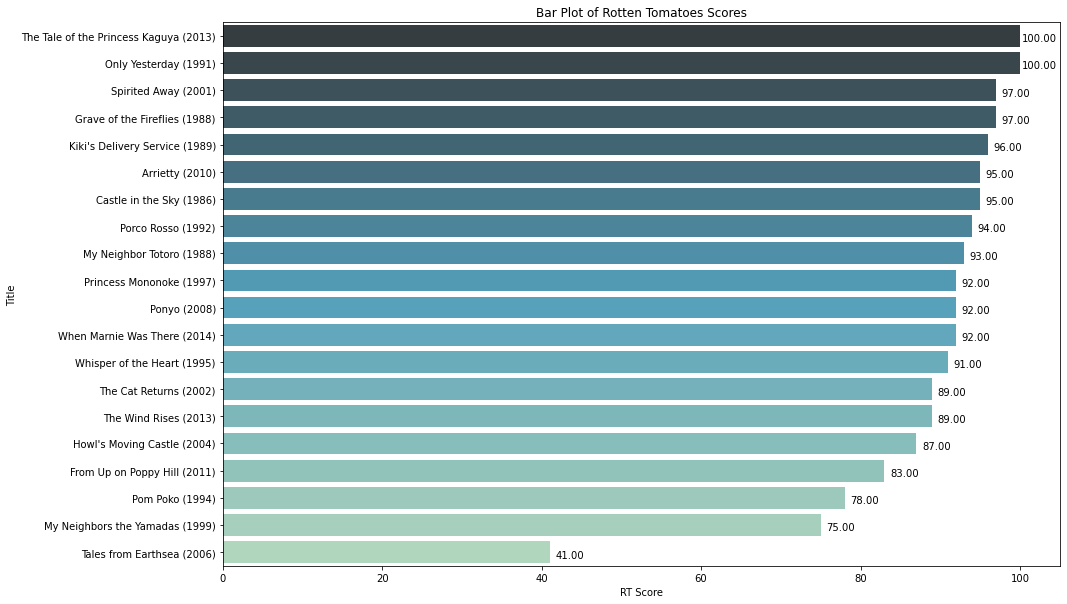

In [25]:
plt.figure(figsize=(15, 10))
rt_plot = sns.barplot(x = df_score['score'], y = df_score['title'], data = df_score, orient = 'h', palette = 'GnBu_d')
rt_plot.set(xlabel = 'RT Score', ylabel = 'Title', title = 'Bar Plot of Rotten Tomatoes Scores')

for p in rt_plot.patches:
    width = p.get_width()
    rt_plot.text(width + 2.5,
                p.get_y() + p.get_height()/2. + 0.2,
                '{:1.2f}'.format(width),
                ha="center", color = 'black')

plt.show()

We see that there are two movies with a RT score of 100, decreasing steadily until 75 for the rest of the movies. The lowest rated RT score is 41, which is significantly different from the rest of the scores.

Now taking a look at the scores, but based on ascending date order.

In [11]:
df_date = df

In [12]:
df_date['title'] = df_date['title'] +' ('+ df_date['release_date'] + ')'

In [18]:
df_date['release_date'] = pd.to_numeric(df_date['release_date'])

In [19]:
df_date = df_date.sort_values('release_date', ascending = True)

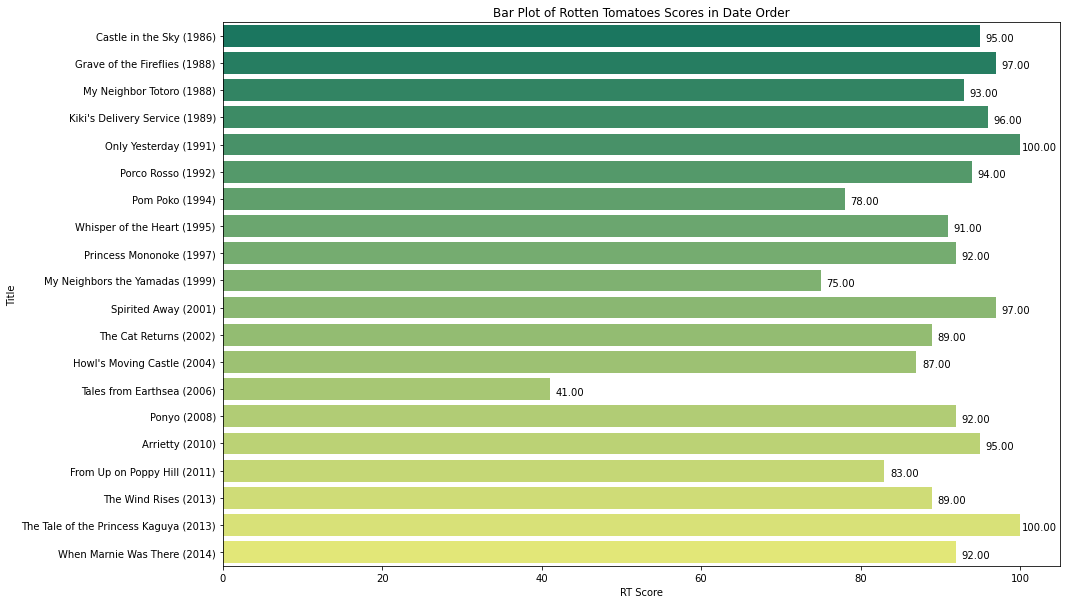

In [31]:
plt.figure(figsize=(15, 10))
date_plot = sns.barplot(x = df_date['score'], y = df_date['title'], data = df_date, orient = 'h', palette = 'summer')
date_plot.set(xlabel = 'RT Score', ylabel = 'Title', title = 'Bar Plot of Rotten Tomatoes Scores in Date Order')

for p in date_plot.patches:
    width = p.get_width()
    date_plot.text(width + 2.5,
                p.get_y() + p.get_height()/2. + 0.2,
                '{:1.2f}'.format(width),
                ha="center", color = 'black')

plt.show()

We see that the scores do not show any significant trends over the years, as the scores seem to fluctuate. However, up to the 90s, there is a consistent score above 90.

We now look at the distribution of films of different directors.

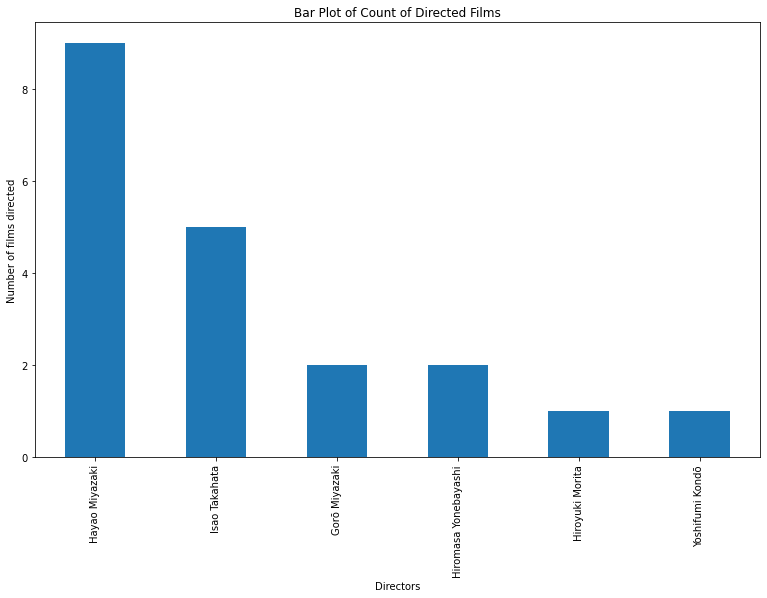

In [14]:
plt.figure(figsize=(13, 8))
director_plot = df['director'].value_counts().plot.bar()
director_plot.set(xlabel = 'Directors', ylabel = 'Number of films directed', title = 'Bar Plot of Count of Directed Films')
plt.show()

We see that Hayao Miyazaki indeed has a largest influence on the Studio Ghibli movies.